In [1]:
"""
Author: InquisitorNova(Kaylen Smith Darnbrook)
Date: 12/12/2023
File_Name: Tropical_Cyclone_Preprocessing
Description:
"""
import numpy as np 
import scipy as sp 
import sklearn as sk
import matplotlib.pyplot as plt 
import pandas as pd 
import pytorch_lightning as pyl
import torch as tor 
import seaborn as sns
from skimage.transform import resize
from PIL import Image 
import skorch
import tables
import h5py

# Atlantic Data

In [2]:
# load "info" as pandas dataframe
data_path = r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\TCIR-ATLN_EPAC_WPAC.h5\TCIR-ATLN_EPAC_WPAC.h5"
data_info = pd.read_hdf(data_path, key="info", mode='r')

# load "matrix" as numpy ndarray, this could take longer times
with h5py.File(data_path, 'r') as hf:
    atln_data_matrix = hf['matrix'][:]

In [3]:
# Explore the cyclone images and labels:

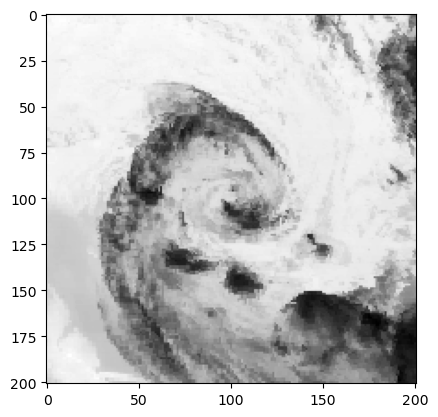

In [4]:
# Infrared Image
plt.imshow(atln_data_matrix[15, :, :, 0], cmap = "gray")

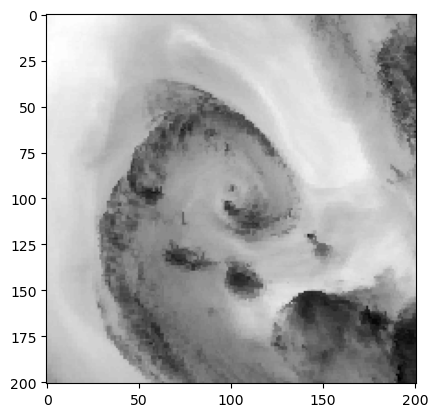

In [5]:
# Water Vapour
plt.imshow(atln_data_matrix[15, :, :, 1], cmap = "gray")

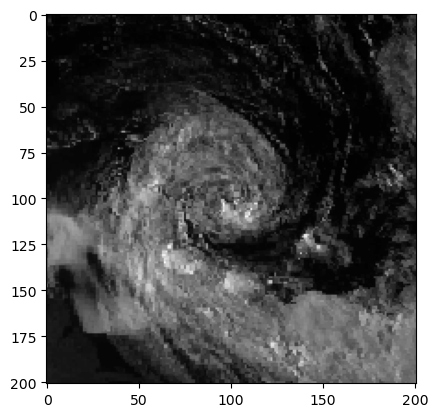

In [6]:
#Visible
plt.imshow(atln_data_matrix[15, :, :,2], cmap = "gray")

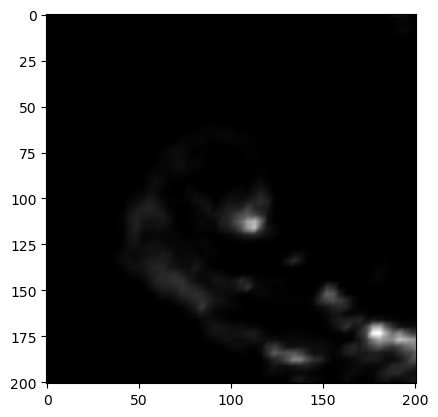

In [7]:
#Microwave
plt.imshow(atln_data_matrix[15, :, :,3], cmap = "gray")

In [8]:
data_info

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,200301L,-66.2,29.1,2003041800,30.0,0.0,1008.0
1,ATLN,200301L,-66.1,29.5,2003041803,30.0,0.0,1008.0
2,ATLN,200301L,-66.0,29.9,2003041806,30.0,0.0,1008.0
3,ATLN,200301L,-65.9,30.4,2003041809,30.0,0.0,1008.0
4,ATLN,200301L,-65.8,30.8,2003041812,30.0,0.0,1008.0
...,...,...,...,...,...,...,...,...
47376,WPAC,201630W,114.6,13.6,2016122718,30.0,0.0,1004.0
47377,WPAC,201630W,113.9,13.2,2016122721,28.0,0.0,1006.0
47378,WPAC,201630W,113.3,12.9,2016122800,25.0,0.0,1007.0
47379,WPAC,201630W,112.8,12.4,2016122803,23.0,0.0,1007.0


# CPAC Data

In [9]:
# load "info" as pandas dataframe
data_path_2 = r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\TCIR-CPAC_IO_SH.h5\TCIR-CPAC_IO_SH.h5"
data_info_CPAC = pd.read_hdf(data_path, key="info", mode='r')

# load "matrix" as numpy ndarray, this could take longer times
with h5py.File(data_path, 'r') as hf:
    cpac_data_matrix = hf['matrix'][:]

In [12]:
# Mask out cyclones which have nans
atln_mask_2 = np.isnan(atln_data_matrix[:,:,:,2]).any(axis = (1,2))
cpac_mask_2 = np.isnan(cpac_data_matrix[:,:,:,2]).any(axis = (1,2))

atln_cleaned_data = atln_data_matrix[~atln_mask_2]
cpac_cleaned_data = cpac_data_matrix[~cpac_mask_2]

data_cleaned_info = data_info[~atln_mask_2]
data_cpac_cleaned_info = data_info_CPAC[~cpac_mask_2]

In [13]:
# Mask out cyclones which have nans
atln_mask_0 = np.isnan(atln_cleaned_data[:,:,:,0]).any(axis = (1,2))
cpac_mask_0 = np.isnan(cpac_cleaned_data[:,:,:,0]).any(axis = (1,2))

atln_cleaned_data = atln_cleaned_data[~atln_mask_0]
cpac_cleaned_data = cpac_cleaned_data[~cpac_mask_0]

data_cleaned_info = data_cleaned_info[~atln_mask_0]
data_cpac_cleaned_info = data_cpac_cleaned_info[~cpac_mask_0]


In [14]:
# Mask out cyclones which have nans
atln_mask_1 = np.isnan(atln_cleaned_data[:,:,:,1]).any(axis = (1,2))
cpac_mask_1 = np.isnan(cpac_cleaned_data[:,:,:,1]).any(axis = (1,2))

atln_cleaned_data = atln_cleaned_data[~atln_mask_1]
cpac_cleaned_data = cpac_cleaned_data[~cpac_mask_1]

data_cleaned_info = data_cleaned_info[~atln_mask_1]
data_cpac_cleaned_info = data_cpac_cleaned_info[~cpac_mask_1]

In [15]:
# Mask out cyclones which have nans
atln_mask_3 = np.isnan(atln_cleaned_data[:,:,:,3]).any(axis = (1,2))
cpac_mask_3 = np.isnan(cpac_cleaned_data[:,:,:,3]).any(axis = (1,2))

atln_cleaned_data = atln_cleaned_data[~atln_mask_3]
cpac_cleaned_data = cpac_cleaned_data[~cpac_mask_3]

data_cleaned_info = data_cleaned_info[~atln_mask_3]
data_cpac_cleaned_info = data_cpac_cleaned_info[~cpac_mask_3]

In [16]:
# Mask out the cyclones on the night side of the planet
tol = 1e-3
Mapping = lambda x: np.all(np.where(np.abs(x) <= tol, 0, x) == 0)
atln_zero_Mask = np.array([Mapping(x) for x in atln_cleaned_data[:, :, :, 2]])
print(atln_zero_Mask.shape)
atln_data = atln_cleaned_data[~atln_zero_Mask]
atln_info = data_cleaned_info[~atln_zero_Mask]

(17948,)


In [17]:
Mapping = lambda x: np.all(np.where(np.abs(x) <= tol, 0, x) == 0)
cpac_zero_Mask = np.array([Mapping(x) for x in cpac_cleaned_data[:, :, :, 2]])
print(cpac_zero_Mask.shape)
cpac_data = cpac_cleaned_data[~cpac_zero_Mask]
cpac_info = data_cpac_cleaned_info[~cpac_zero_Mask]

(17948,)


In [22]:
# Concatenate the information into a training dataset
Dataset = np.concatenate([atln_data, cpac_data], axis = 0)
print(Dataset.shape)

labels = np.concatenate([atln_info, cpac_info], axis = 0)
print(labels.shape)

MemoryError: Unable to allocate 19.1 GiB for an array with shape (31678, 201, 201, 4) and data type float32

In [21]:
np.save("atln_cyclone_images.npy", atln_data)
np.save("cpac_cyclone_images.npy", cpac_data)
np.save("atln_labels.npy", atln_info)
np.save("cpac_labels.npy",cpac_info)

In [ ]:
labels = pd.DataFrame(labels, columns = ["data_set", "ID", "lon", "latitude", "time", "Vmax", "R35", "MSLP"])

In [ ]:
Filter_Dataset = Dataset[list(labels[labels["R35"] > 0.0].index)]

In [ ]:
Filter_labels = labels[labels["R35"] > 0.0]
Filter_labels.head()

,data_set,ID,lon,latitude,time,Vmax,R35,MSLP
664,ATLN,200401L,-79.2,31.6,2004080115,33.0,12.5,1009.0
665,ATLN,200401L,-79.2,31.6,2004080118,35.0,25.0,1009.0
666,ATLN,200401L,-79.3,31.6,2004080121,35.0,25.0,1008.0
667,ATLN,200401L,-79.3,31.5,2004080200,35.0,25.0,1007.0
668,ATLN,200401L,-79.3,31.4,2004080203,38.0,42.5,1006.0


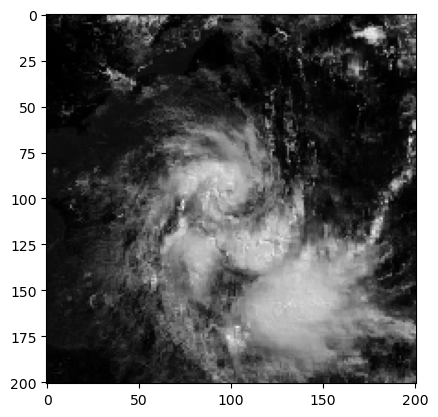

In [ ]:
plt.imshow(Filter_Dataset[2645,:,:], cmap = "gray")